# Homework 3

## Problem 1: Logistic map, chaos, bifurcation

Consider the logic map

$$
  x_{n+1} = \alpha x_n (1-x_n)
$$

Write a program to calculates and displays the behavior of the logistic map.

* For a give value of $\alpha$, start with $x=0.5$ and iterate the logistic map equation a thousand times. 
  * That will give it a chance to settle down to a fixed point or limit cycle if its going to.

* Run for another thousand iterations and plot the points $(\alpha,x)$ on a graph where the horizontal axis is $\alpha$ and the vertical axis is $x$.

* Repeat the whole calculation for values of $\alpha$ from 1 to 4 in steps of 0.01, plotting the dots for all values of $\alpha$ on the same figure.

Reference: https://en.wikipedia.org/wiki/Logistic_map

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
?figure

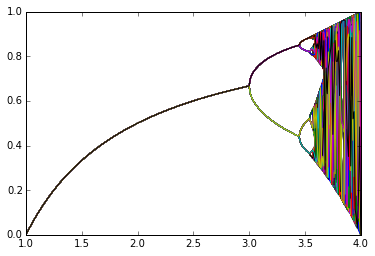

In [13]:
# Problem 1
import math
import numpy as np

def logic_map(a):
    x=0.5
    n=0
    while n<=1000:
        x=a*x*(1-x)
        n=n+1
        i=0
        for i in range(1000):
            x=a*x*(1-x)
        plot(a, x)
    show()
        
logic_map(linspace(1, 4, 301))

## Problem 2: The Mandelbrot set



Consider the equation
$$
  z^\prime=z^2+c,
$$
where $z$ is a complex number and $c$ is a complex constant.

For a given complex value of $c$, start with $z = 0$ and iterate repeatedly. 
If the magnitude $|z|$ of the resulting value is ever greater than $2$, 
then the point in the complex plane at position $c$ is not in the Mandelbrot set, 
otherwise it is in the set.

In principle, one has to iterate infinitely many times to prove that a point is in the Mandelbrot set.
In practice, however, one usually just performs some large number of iterations, 
say 100 or 1000, and if $|z|$ hasn't exceeded 2 by that point then we call that good enough.

Write a program to make an image of the Mandelbrot set by performing the iteration for all values of $c = x + iy$ on an $N \times N$ grid spanning the region where $-2 \le x \le 2$ and $-2 \le y \le 2$. Make a **density plot** in which grid points inside the Mandelbrot set are colored black and those outside are colored white. 


Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a small value of $N$
(perhaps $N = 100$) so that your program runs quickly while you are testing it. 
Once you are sure it is working correctly, increase the value of $N$ to produce a final high-quality image of the shape of the set.

Instead of coloring points just black or white, color points according to the number of iterations of the equation before $z$ becomes greater than $2$ (or the maximum number of iterations if $|z|$ never becomes greater than 2). Use color schemes such as the `hot` or `jet` schemes. 

Or to color according to the logarithm of the number of iterations.

Reference: https://en.wikipedia.org/wiki/Mandelbrot_set

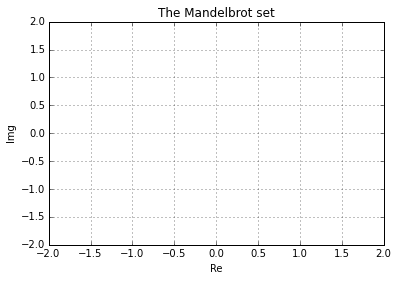

In [41]:
# Problem 2
import cmath
import numpy as np

c=x+1j*y

def mandel(c):
    z=0
    for i in range(0,20):
        z=z**2+c
        if abs(z) > 2.0:
            break
    if abs(z) >= 2.0:
        return False
    else:
        return True
    
for x in range(0,1000):
    real = x/100.0-1.5
    for y in range(0,1000):
        img = y/100.0-1.5
        

xlabel('Re')
ylabel('Img')
axis([-2., 2., -2., 2.])
title('The Mandelbrot set')
grid(True)
jet()
show()

## Problem 3: Quadratic equations

### Problem 3.1

Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard ￼formula

$$
  x = \frac{-b\pm\sqrt{b^2-4ac}}{2a}.
$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [1]:
# Problem 3.1
import cmath

def f(a, b, c):
    return (-b+cmath.sqrt(b**2-4*a*c))/(2*a), (-b-cmath.sqrt(b**2-4*a*c))/(2*a)

print f(0.001, 1000, 0.001)

((-9.999894245993346e-07+0j), (-999999.999999+0j))


### Problem 3.2

There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b\mp\sqrt{b^2-4ac}$, one can show that the solutions ￼can also be written as

$$
  x = \frac{2c}{-b\mp\sqrt{b^2-4ac}}.
$$

Write a program that takes as input three numbers, a, b, and c, and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using this formula. Use the program to solve $0.001x^2 + 1000x + 0.001 = 0$.

In [2]:
# Problem 3.2
import cmath

def g(a, b, c):
    return ((2*c)/(-b-cmath.sqrt(b**2-4*a*c)), (2*c)/(-b+cmath.sqrt(b**2-4*a*c)))

print g(0.001, 1000, 0.001)

((-1.000000000001e-06-0j), (-1000010.5755125057-0j))


### Problem 3.3

The correct solutions to the quadratic equation $0.001x^2 + 1000x + 0.001 = 0$ should be

$$
  x_1 = -1.00000000000100002081668371*10^{-6}, \\
  x_2 = -9.99999999999000060986371202*10^{5}
$$

You should find out that one of the solutions is not very accurate for your code in problem 3.1 and 3.2. Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

## Problem 4: Numerical derivatives

The derivative of a functoin $f(x)$ is defined as

$$
  \frac{df}{dx} = \lim_{\delta\rightarrow 0} \frac{f(x+\delta)-f(x)}{\delta}.
$$

On the computer we can’t actually take the limit as $\delta$ goes to zero, but we can get a reasonable approximation just by making $\delta$ small.

### Problem 4.1

Write a program that defines a function $f(x)$ returning the value $x(x − 1)$, then calculates the derivative of the function at the point $x = 1$ using the formula above with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives.

In [15]:
# Problem 4.1
def f(x):
    return x*(x-1)

def derivative_f(x):
    h=0.01
    return (f(x+h)-f(x))/h
    
print derivative_f(1)

1.01


In [16]:
def true_deritive_f(x):
    return 2*x-1
    
print true_deritive_f(1)

1


### Problem 4.2

Repeat the calculation for $\delta = 10^{−4}$ , $10^{−6}$ , $10^{−8}$ , $10^{−10}$ , $10^{−12}$ , and $10^{−14}$. You should see that the accuracy of the calculation initially gets better as δ gets smaller, but then gets worse again. Why is this?

In [16]:
# Problem 4.2
def derivative_f(x):
    h=10**(-4)
    return (f(x+h)-f(x))/h
    
print derivative_f(1)

1.0001


In [17]:
def derivative_f(x):
    h=10**(-6)
    return (f(x+h)-f(x))/h
    
print derivative_f(1)

1.00000099992


In [18]:
def derivative_f(x):
    h=10**(-8)
    return (f(x+h)-f(x))/h
    
print derivative_f(1)

1.00000000392


In [19]:
def derivative_f(x):
    h=10**(-10)
    return (f(x+h)-f(x))/h
    
print derivative_f(1)

1.00000008284


In [20]:
def derivative_f(x):
    h=10**(-12)
    return (f(x+h)-f(x))/h
    
print derivative_f(1)

1.00008890058


In [21]:
def derivative_f(x):
    h=10**(-14)
    return (f(x+h)-f(x))/h
    
print derivative_f(1)

0.999200722163


### Problem 4.3

Plot the error of your numerical derivative a function of $\log(\delta)$, with $\delta \in [10^{-2}, 10^{-14}]$.

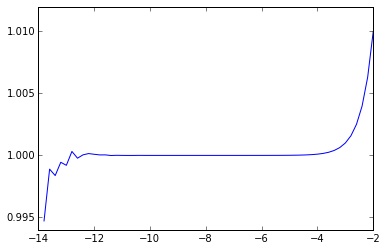

In [14]:
# Problem 4.3
def f(x):
    return x*(x-1)

def derivative_f(h):
    return (f(1+h)-f(1))/h

def picture():
    a=[]
    j=np.arange(-2,-14,-0.2)
    for i in arange(-2,-14,-0.2):
        a.append(derivative_f(10**i))
    plot(j,a)

picture()